In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from math import sqrt
import scipy

# ЗАДАНИЕ 1

<img src="1.png">

In [71]:
# tlfba2 обычная доза приема алкоголя (гр)
# tlfbh2 обычная доза употребления героина (мгр)
# cravin собственная оценка необходимой дозы героина
# sex пол: 1 – женский, 0 – мужской
data = pd.read_csv('var9.tsv', sep = '\t', decimal=',')
data.sort_values('tlfbh2')

,sex,age,curent_working,tlfba2,tlfbh2,cravin
241,0,25,0,10.1,0.60,1.0
268,0,21,0,12.6,5.80,3.0
170,0,22,0,8.2,11.10,3.5
42,0,31,1,5.7,17.33,1.4
100,1,25,0,0.9,22.20,5.0
...,...,...,...,...,...,...
87,0,24,1,144.0,2511.00,1.2
69,0,23,1,1.4,2583.00,9.7
14,0,25,0,0.0,3072.00,0.1
12,0,29,0,0.2,3111.00,4.0


<BarContainer object of 280 artists>

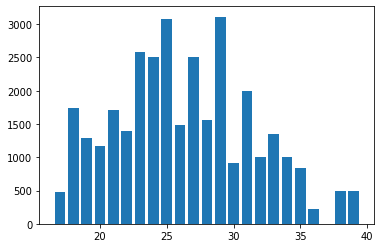

In [98]:
plt.bar(np.array(data['age']), np.array(data['tlfbh2']))

Можно немного проследить что сначала по возрасту возрастает, потом убывает, но не особо.

<BarContainer object of 280 artists>

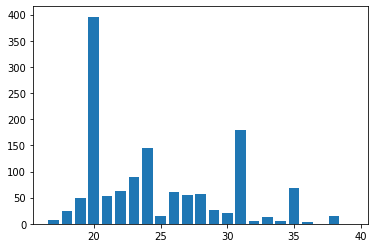

In [100]:
plt.bar(np.array(data['age']), np.array(data['tlfba2']))

То же самое, но дикий пик в 20 лет (как потом окажется, там просто выброс).

Выходит полная фигня. Копаем глубже

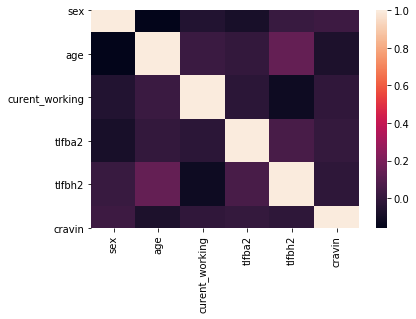

In [15]:
sns.heatmap(data.corr())

Корреляций особых, к сожалению нет (только отрецательные между работаешь/нет и героином), но давайте получше посмотрим на всякие зависимости:

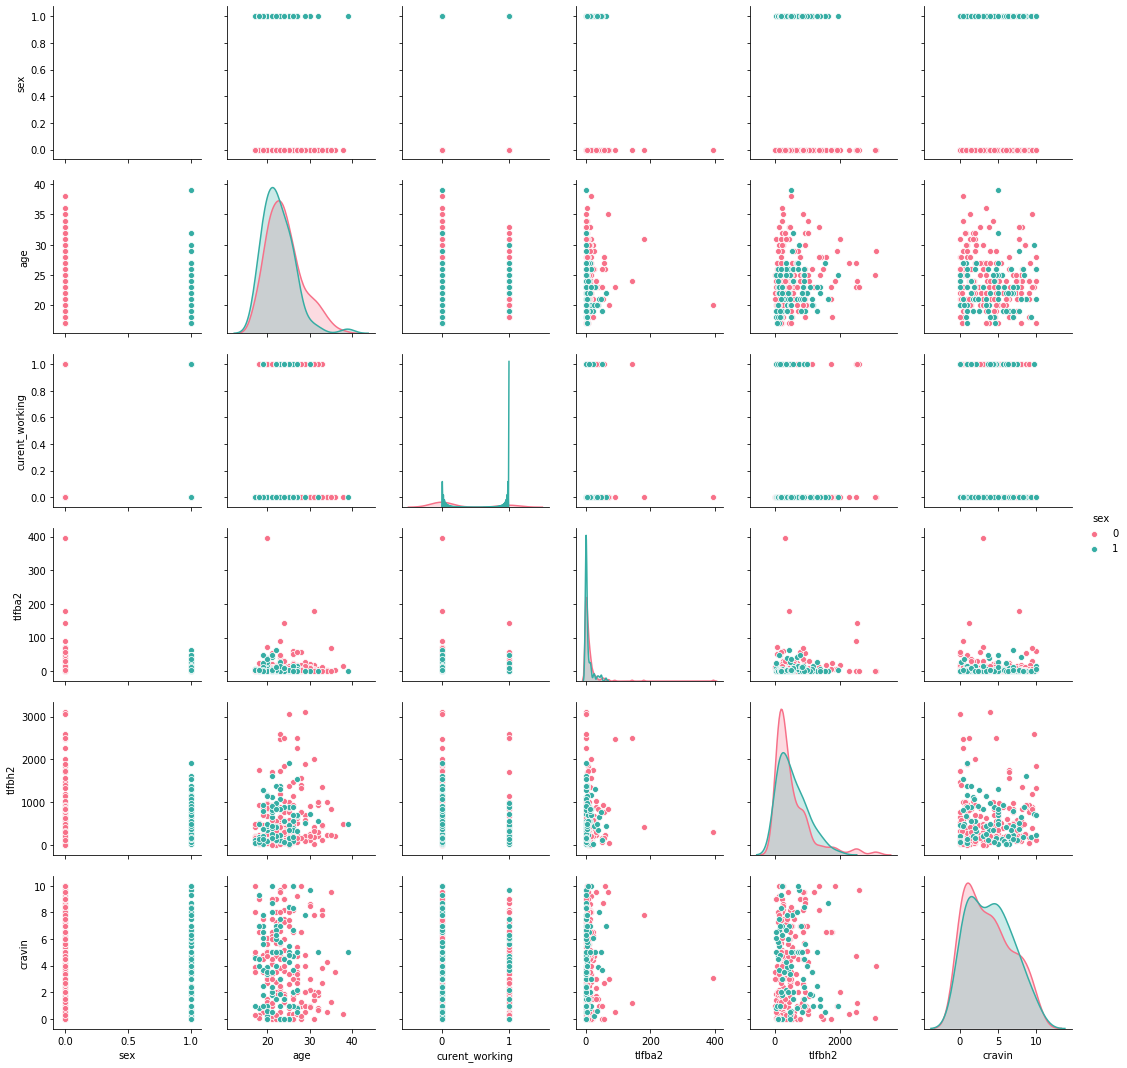

In [93]:
sns.pairplot(data, hue="sex", palette="husl");

Не густо. Почекаю описание, по полу разделю, будет лучше наверное.

In [49]:
data.groupby('sex').describe()

age                                                    curent_working  \
     count       mean       std   min   25%   50%   75%   max          count   
sex                                                                            
0    203.0  24.068966  4.278101  17.0  21.0  23.0  26.0  38.0          203.0   
1     77.0  22.597403  3.671583  17.0  20.0  22.0  25.0  39.0           77.0   

               ...   tlfbh2         cravin                                     \
         mean  ...      75%     max  count      mean       std  min  25%  50%   
sex            ...                                                              
0    0.285714  ...  709.825  3111.0  203.0  3.840394  2.991613  0.0  1.0  3.5   
1    0.233766  ...  833.300  1925.0   77.0  4.042857  2.811135  0.0  1.5  4.0   

                
     75%   max  
sex             
0    6.1  10.0  
1    6.1  10.0  

[2 rows x 40 columns]

In [70]:
data.groupby('sex').median()

,age,curent_working,tlfba2,tlfbh2,cravin
sex,,,,,
0,23,0,5.30,304.25,3.5
1,22,0,1.99,455.60,4.0


о, да, го посмотрим на боксплоты употребления алко и героина в зависимости от пола(хотя и так видно, что медиана намного больше у парней для алко и у девушек для героина)

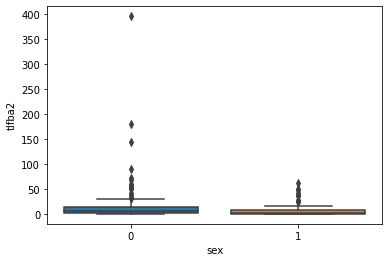

In [38]:
sns.boxplot(y=data.tlfba2, x=data.sex)

Алкоголик, который выжирает 400 грамм спирта, все портит, удалю его. Он является выбросом и в прямом, и в переносном смысле.
Лучше все-таки новый датафрейм создам

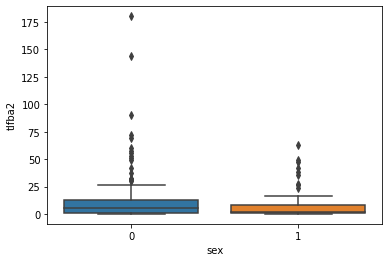

In [50]:
data_ok = data[data.tlfba2 < 300]
sns.boxplot(y=data_ok.tlfba2, x=data_ok.sex)

Все равно не ок, плохо видно. Еще подудалим выбросы

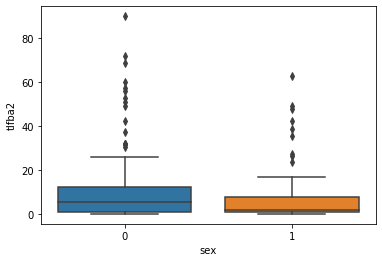

In [52]:
data_ok_2 = data[data.tlfba2 < 125]
sns.boxplot(y=data_ok_2.tlfba2, x=data_ok_2.sex)

А если удалить непьющих?

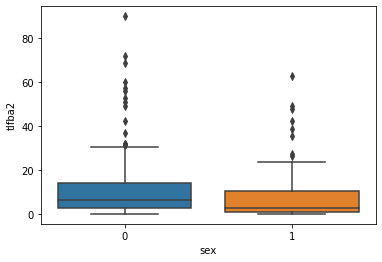

In [63]:
data_norm_alco = data_ok_2[data_ok_2.tlfba2 > 0]
sns.boxplot(y=data_norm_alco.tlfba2, x=data_norm_alco.sex)

In [64]:
data_alco = data[data.tlfba2 > 0]
data_alco.groupby('sex').median()

,age,curent_working,tlfba2,tlfbh2,cravin
sex,,,,,
0,23,0,6.6,257.8,3.5
1,22,0,2.7,455.6,3.9


О, ну вот видно лучше, что мужчины пьют заметно больше, чем женщины. И квартиль больше, и медиана (среди всех медиана = 5.3 у мужчин и 1.99 у женщин, а среди пьющих 6.6 у мужчин и 2.7 у женщин (все в граммах спирта, видимо - маловато))))).
Проделаю тоже самое с героином.

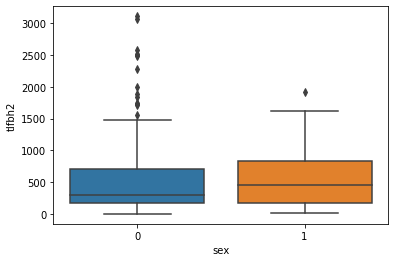

In [89]:
sns.boxplot(y=data.tlfbh2, x=data.sex)

Все хорошо, в среднем девушки больше употребляют наркотики.
Проверим, есть ли неупотребляющие:

In [79]:
data_hero = data[data.tlfbh2 == 0]
data_hero

,sex,age,curent_working,tlfba2,tlfbh2,cravin


Неа
Итак, среди всех употребляют в среднем: мужчины 304.25 мг героина, а девушки 455.60 мг.
Неупотребляющих в данном датасете не представлено.
Ну и на оценку необходимой дозы героина взглянем.

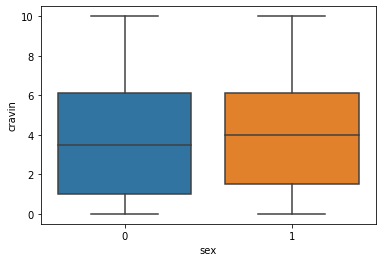

In [91]:
sns.boxplot(y=data.cravin, x=data.sex)

Не особо большая разница, у женщин чуть больше --- 4 против 3.5 (ну так как они употребляют чуть больше).

усе!

# Задание 2


<img src="2.png">

Все переменные понятны, theta -  наш параметр, генерируем 3 выборки размером 400б 10к и 100к; и рисуем плотность распределения (1, 3, 5) и функцию распределения(2, 4, 6).

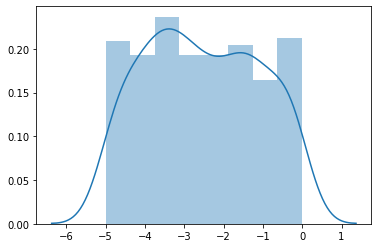

In [42]:
theta = 5
sample = np.random.uniform(low=-theta, high=0, size=400)
sns.distplot(sample)

(array([0.04  , 0.085 , 0.12  , 0.1575, 0.185 , 0.215 , 0.255 , 0.275 ,
        0.3125, 0.355 , 0.3925, 0.4275, 0.4525, 0.4775, 0.4925, 0.52  ,
        0.5675, 0.5975, 0.63  , 0.665 , 0.7   , 0.7275, 0.7775, 0.8025,
        0.8325, 0.86  , 0.905 , 0.935 , 0.97  , 1.    ]),
 array([-4.99621055, -4.83021116, -4.66421178, -4.4982124 , -4.33221301,
        -4.16621363, -4.00021424, -3.83421486, -3.66821547, -3.50221609,
        -3.33621671, -3.17021732, -3.00421794, -2.83821855, -2.67221917,
        -2.50621978, -2.3402204 , -2.17422102, -2.00822163, -1.84222225,
        -1.67622286, -1.51022348, -1.34422409, -1.17822471, -1.01222533,
        -0.84622594, -0.68022656, -0.51422717, -0.34822779, -0.1822284 ,
        -0.01622902]),
 <a list of 30 Patch objects>)

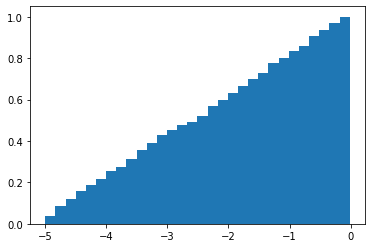

In [25]:
plt.hist(sample,cumulative=True, density=True, bins=30)

ну такооое, есть заскоки. Попробую то же самое на 10000 и 100000.

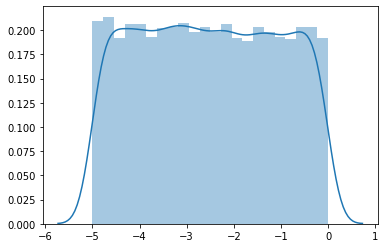

In [34]:
sample_2 = np.random.uniform(low=-theta, high=0, size=10000)
sns.distplot(sample_2)

(array([0.0352, 0.0694, 0.1037, 0.1371, 0.1705, 0.2049, 0.2392, 0.2714,
        0.3034, 0.3377, 0.3723, 0.4066, 0.4406, 0.4748, 0.5076, 0.5391,
        0.5736, 0.6069, 0.639 , 0.6709, 0.7041, 0.7372, 0.7716, 0.8026,
        0.8345, 0.8668, 0.9008, 0.9344, 0.9691, 1.    ]),
 array([-4.99982055e+00, -4.83316154e+00, -4.66650253e+00, -4.49984352e+00,
        -4.33318451e+00, -4.16652550e+00, -3.99986649e+00, -3.83320748e+00,
        -3.66654847e+00, -3.49988946e+00, -3.33323046e+00, -3.16657145e+00,
        -2.99991244e+00, -2.83325343e+00, -2.66659442e+00, -2.49993541e+00,
        -2.33327640e+00, -2.16661739e+00, -1.99995838e+00, -1.83329937e+00,
        -1.66664036e+00, -1.49998135e+00, -1.33332234e+00, -1.16666333e+00,
        -1.00000432e+00, -8.33345310e-01, -6.66686300e-01, -5.00027290e-01,
        -3.33368281e-01, -1.66709271e-01, -5.02612709e-05]),
 <a list of 30 Patch objects>)

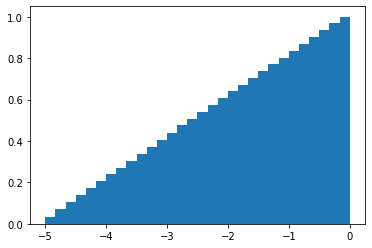

In [35]:
plt.hist(sample_2,cumulative=True, density=True, bins=30)

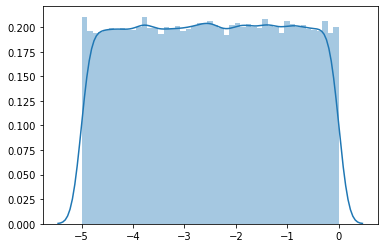

In [36]:
sample_3 = np.random.uniform(low=-theta, high=0, size=100000)
sns.distplot(sample_3)

(array([0.0342 , 0.06651, 0.09922, 0.13245, 0.16517, 0.1979 , 0.23154,
        0.26603, 0.29903, 0.33156, 0.36452, 0.39785, 0.43106, 0.46498,
        0.49908, 0.53279, 0.56587, 0.59873, 0.63262, 0.66634, 0.69929,
        0.73342, 0.76721, 0.80029, 0.83422, 0.86763, 0.90089, 0.93353,
        0.96672, 1.     ]),
 array([-4.99997839e+00, -4.83331290e+00, -4.66664741e+00, -4.49998192e+00,
        -4.33331643e+00, -4.16665094e+00, -3.99998545e+00, -3.83331996e+00,
        -3.66665447e+00, -3.49998898e+00, -3.33332349e+00, -3.16665800e+00,
        -2.99999251e+00, -2.83332702e+00, -2.66666153e+00, -2.49999604e+00,
        -2.33333055e+00, -2.16666506e+00, -1.99999957e+00, -1.83333408e+00,
        -1.66666859e+00, -1.50000310e+00, -1.33333761e+00, -1.16667212e+00,
        -1.00000663e+00, -8.33341140e-01, -6.66675649e-01, -5.00010159e-01,
        -3.33344669e-01, -1.66679179e-01, -1.36893031e-05]),
 <a list of 30 Patch objects>)

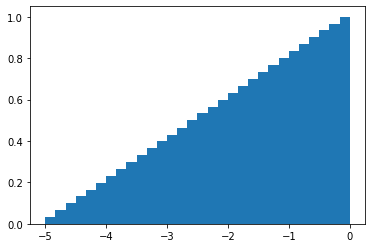

In [37]:
plt.hist(sample_3,cumulative=True, density=True, bins=30)

Defenetly, намного равномернее равномерное распределение)).

### 2a. Сходимости

Нужно продемонстрировать сходимость оценки параметра к истинному значению. Сделаем же это!
theta_hats - оценки этого параметра

In [106]:
def draw_convergence(x, y, title, theta):
    x = np.array(x)
    y = np.array(y)
    
    data = np.column_stack((x, y))

    fig, (ax1) = plt.subplots(
        nrows=1, ncols=1,
        figsize=(10, 10)
    )
    plt.plot([0, max(x)],[theta,  theta], linestyle="-", color = 'lime')
#     ax1.scatter(x=x, y=y, marker='o', c='r', edgecolor='b')
    ax1.scatter(x=x, y=y, marker='o', c='r', edgecolor='b')
    ax1.set_title(title)

    plt.show()

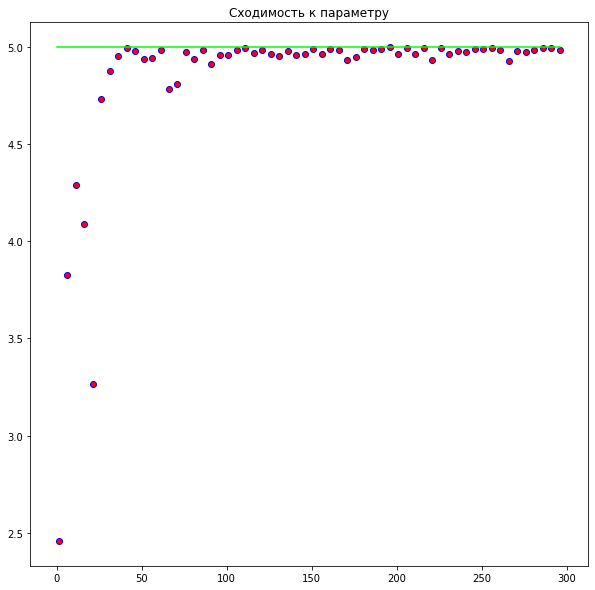

In [134]:
theta_hats = []
diff = []
# Точек будет max_n*5+1
max_n = 60
theta_hats.append(min(np.random.uniform(low=-theta, high=0, size=1))*-1)
for i in range (1, max_n):
    theta_hats.append(min(np.random.uniform(low=-theta, high=0, size=i*5))*-1)
    diff.append(abs(theta_hats[i-1]-theta_hats[i-2]))
draw_convergence([i for i in range (1, max_n*5+1, 5)], theta_hats, 'Сходимость к параметру', theta)

Сходится (вроде даже оценка несмещенная), теперь посмотрим на скорость сходимости.
Для этого я кроме самих значений вычислял разницу между соседними элементами (массив diff). Он стремится к нулю, если сходится (сейчас мы это увидим), и скорость можно посмотреть асимптотически. Сделаем это!

In [128]:
def draw_speed(x, y, title, theta):
    x = np.array(x)
    y = np.array(y)
    
    data = np.column_stack((x, y))

    fig, (ax1) = plt.subplots(
        nrows=1, ncols=1,
        figsize=(10, 10)
    )
#     plt.plot([0, max(x)],[theta,  theta], linestyle="-", color = 'lime')
#     ax1.scatter(x=x, y=y, marker='o', c='r', edgecolor='b')
    ax1.scatter(x=x, y=y, marker='o', c='r', edgecolor='b')
    ax1.set_title(title)

    plt.show()

Красный - разница между соседними эементами функции, 

Синяя пунктирная линия - 1/sqrt(n)

Пунктирная линия цвета индиго (фиолетовенькая) - 1/n

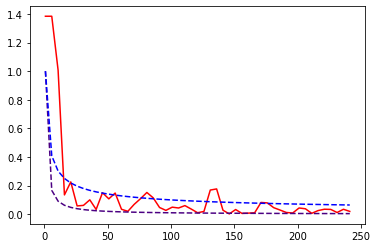

In [131]:
# draw_speed([i for i in range (1, max_n*5-5, 5)], diff, 'Скорость', theta)
plt.plot([i for i in range (1, max_n*5-5, 5)], diff, linestyle="-", color = 'red')
plt.plot([i for i in range (1, max_n*5-5, 5)], [1/i for i in range (1, max_n*5-5, 5)], linestyle="--", color = 'indigo')
plt.plot([i for i in range (1, max_n*5-5, 5)], [1/sqrt(i) for i in range (1, max_n*5-5, 5)], linestyle="--", color = 'blue')

Видно, что асимптотически скорость сходимости пропорциональна $\frac{1}{\sqrt{n}}$. КРУТО.

### 2б - с неравенством Рио-Крамера (=> мягкий дедлайн 11го, сделаю на выходных!) 

# Задание 3

<img src="3.png">
И пояснения:
<img src="3_2.png">

### Это задание тоже сказали на паре, что мягкий дедайн = жесткий дедлайн, т.е. можно получить фидбек и переделать, сдав после мягкого (но до жесткого). Чудесно!

# Задание 4
<img src="4.png">
Показать, что $D_n$ имеет предеельное распределение*

Первое, что сделаем - функцию для подсчета эмпирической функции распределения.

ЧТо хранят словари:

* amount[i] - количество элемента = i.
* amount_less[i] - количество элемента < i.

Считается все очевидно, просто сначала считаем количество каждого элемента (amount) , а потом пробегаемся еще раз, и смотрим количество меньших элементов, чем i-й => получаем числитель и чтобы получить саму функцию распределения, делим на знаменатель - получаем f:
* f - эмпирической функции распределения

In [172]:
def f_n(sample):
    amount = {}
    sample.sort()
    for i in sample:
        if i in amount:
            amount[i] += 1
        else:
            amount.update({i:1})
    amount_less = {}
    for i in amount:
        count = 0
        for j in amount:
            if j < i:
                count += amount[j]
        amount_less.update({i:count})
    f = {}
    n = len(sample)
    for i in amount_less:
        f.update({i: amount_less[i]/n})
    return f

Напишем функции для вычисления значений Функции распределения в точке x для двух распределений: равномерного и нормального.

In [175]:
def f_uniform(x, a=0, b=1):
    if x < a: return 0
    if x >= b: return 1
    else: return (x-a)/(b-a)

def f_normal(x, mu = 0, sigma = 1):
    return scipy.stats.norm.cdf((x - mu)/sigma)

Ну и функция для подсчета этого критерия (Колмогорова-Смирнова) (на вход принимает сэмпл и тип сэмпла и параметры типа сэмпла)

1. Сначала бежит по всем значения эмпирической функцции распределения (посчитанной с помощью функции f_n)
2. Считает разницу между значением эмпирической функции распределения f_n_empirical[x] и теоретическим значением f_real (оно зависит от типа распределения, поэтому иф).
3. В супремум всегда будет записана максимальная разница к данному шагу.

Ну и возвращаем разницу, умноженную на $\sqrt{n}$ ($n$ - количество элементов в выборке).

In [229]:
def d_n(sample, dist_type = 'uniform', parameter_a = 0, parameter_b = 1):
    sup = -1
    f_n_empirical = f_n(sample)
    for x in f_n_empirical:
        f_real = 0
        if dist_type == 'uniform':
            f_real = f_uniform(x, parameter_a, parameter_b)
        if dist_type == 'uniform':
            f_real = f_normal(x, parameter_a, parameter_b)
        difference = abs(f_real - f_n_empirical[x])
        if difference > sup:
            sup = difference
    return sup*(sqrt(len(sample)))

Тэперь посчитаем статистику критерия Колмогорова-Смирнова. Сначала для равномерного распределения (max_n - сколько итераций я сделаю, а максимаьный size выборки это max_n* на множитель в задании size, в данном случае множитель равен 20 и макс.сайх = 20*200 = 4000). (Так же буду считать скорость сходимости, для этого (как и во втором задании)).

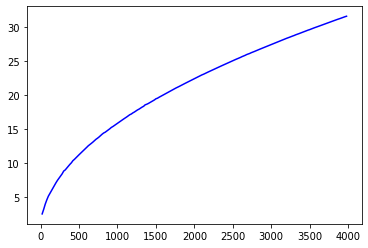

In [239]:
# a, b - параметры в равномерном распределении.
a = 0
b = 100
d_n_uniform = []
d_n_uniform_diff = []
max_n = 200
d_n_uniform.append(d_n(np.random.uniform(low=a, high=b, size=20), 'uniform', a, b))
for i in range (2, max_n):
    print(i, end = ' ')
    d_n_uniform.append(d_n(np.random.uniform(low=a, high=b, size=i*20), 'uniform', a, b))
    d_n_uniform_diff.append(abs(d_n_uniform[i-1]-d_n_uniform[i-2]))

plt.plot([i*20 for i in range (1, max_n)], d_n_uniform, linestyle="-", color = 'blue')

Непонятно, с одной стороны скорость роста падает, но прям сходимости я не вижу, попробую для максимального размера выборки = 10000.

2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 

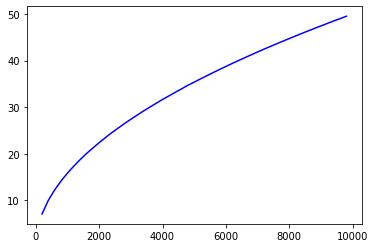

In [243]:
# a, b - параметры в равномерном распределении.
a = 0
b = 100
d_n_uniform = []
d_n_uniform_diff = []
max_n = 50
d_n_uniform.append(d_n(np.random.uniform(low=a, high=b, size=200), 'uniform', a, b))
for i in range (2, max_n):
    print(i, end = ' ')
    d_n_uniform.append(d_n(np.random.uniform(low=a, high=b, size=i*200), 'uniform', a, b))
    d_n_uniform_diff.append(abs(d_n_uniform[i-1]-d_n_uniform[i-2]))

plt.plot([i*200 for i in range (1, max_n)], d_n_uniform, linestyle="-", color = 'blue')

Посмотрю, чему равна разниза между соседними элементами (это убедит, что скорость роста падает):

p.s. как и в номере 2 (и далее):
* Красный - разница между соседними эементами функции, 
* Синяя пунктирная линия - 1/sqrt(n)
* Пунктирная линия цвета индиго (фиолетовенькая) - 1/n

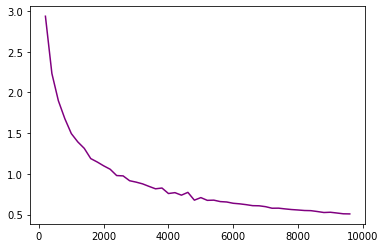

In [249]:
plt.plot([i*200 for i in range (1, max_n-1)], d_n_uniform_diff, linestyle="-", color = 'purple')

Нууу, скорость роста падает, значит можно предположить, что и сама функция стремится к константе.
И теперь посмотрим для нормального распределения:

2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 

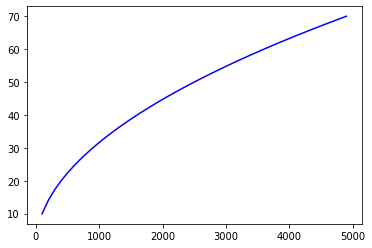

In [241]:
# a, b - параметры в равномерном распределении.
mu = 2
sigma = 100
d_n_normal = []
d_n_normal_diff = []
max_n = 50
d_n_normal.append(d_n(np.random.normal(loc = mu, scale=sigma, size=100), 'normal', mu, sigma))
for i in range (2, max_n):
    print(i, end = ' ')
    d_n_normal.append(d_n(np.random.normal(loc = mu, scale=sigma, size=i*100), 'normal', mu, sigma))
    d_n_normal_diff.append(abs(d_n_normal[i-1]-d_n_normal[i-2]))
plt.plot([i*100 for i in range (1, max_n)], d_n_normal, linestyle="-", color = 'blue')

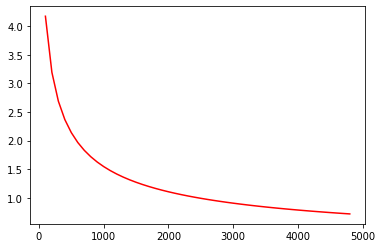

In [248]:
plt.plot([i*100 for i in range (1, max_n-1)], d_n_normal_diff, linestyle="-", color = 'red')

Вцелом, скорость роста падает, но говорить прям об ограниченнности нельзя.
=(